In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline
import plotly.offline as py
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from wrangle import get_assessment_users

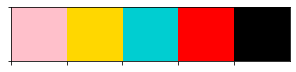

In [2]:
# Create an array with the colors you want to use
heat = [ 'pink', 'gold', 'darkturquoise', 'red', 'black']

# Set your custom color palette
my_pal = sns.color_palette(heat)

sns.palplot(my_pal)

# Read In df

In [180]:
df = pd.read_csv('df_types.csv')

In [181]:
df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
0,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
2,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
3,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
4,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [186]:
df.shape

(5574092, 18)

# Games-Only df

- 25,488 game_times with 0 values

- all of the above observations have event_codes of 2000, start event

In [187]:
games_df = df[df.type == 'Game']
(games_df[games_df.game_time == 0]).event_code.value_counts()

2000    25488
Name: event_code, dtype: int64

In [188]:
games_df.shape

(2782034, 18)

## Drop event_code rows with 0 value in game_time

In [176]:
(df[df.game_time == 0]).event_code.value_counts()

2000    126135
3010      7519
2020      3051
2025       227
4070        14
Name: event_code, dtype: int64

In [192]:
df = df[df.game_time != 0]

In [193]:
(df[df.game_time == 0]).event_code.value_counts()

Series([], Name: event_code, dtype: int64)

# Create median accuracy col

In [194]:
median = df.groupby('installation_id')[['accuracy']].median()

In [195]:
median

,accuracy
installation_id,
0006a69f,0.500000
0006c192,0.000000
001d0ed0,0.500000
002db7e3,0.090909
003372b0,0.500000
004c2091,1.000000
00634433,1.000000
00667b88,1.000000
00691033,0.000000


In [196]:
df = df.merge(median, on='installation_id', how='left')

In [197]:
df.head(2)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy_x,accuracy_group,date,hour,weekday,accuracy_y
0,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,0.5
1,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,0.5


In [198]:
df.shape

(5437146, 19)

In [199]:
df.rename(columns={'accuracy_x': 'accuracy', 'accuracy_y': 'median'}, inplace=True)

In [200]:
df.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,median
0,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,0.5


# Create game_mins Col 

- with game_time converted to minutes

In [201]:
df['game_mins'] = df.game_time / 60_000

In [202]:
df.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday,median,game_mins
0,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday,0.5,0.000483


# Create df with max game_time by game_session

In [203]:
game_time_group = df.groupby(['installation_id', 'game_session','type','date', 'weekday'])[['game_mins']].max().reset_index()

In [204]:
game_time_group.head(5)

,installation_id,game_session,type,date,weekday,game_mins
0,0006a69f,0336db4dee65ad4b,Game,2019-08-06,Tuesday,1.929867
1,0006a69f,05921a6eb858eeba,Activity,2019-08-06,Tuesday,1.525133
2,0006a69f,0721802df0531701,Game,2019-08-29,Thursday,2.788950
3,0006a69f,1623f262016185e4,Game,2019-08-06,Tuesday,1.341283
4,0006a69f,203959bf44d06632,Game,2019-08-29,Thursday,2.459233


In [205]:
game_time_group.shape

(59977, 6)

In [206]:
game_time_group.describe()

,game_mins
count,59977.000000
mean,3.244713
std,34.680020
min,0.000317
25%,0.660550
50%,1.355833
75%,2.555183
max,5115.170817


# Total Minutes of game_time by User

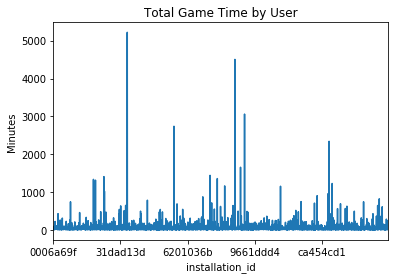

In [248]:
game_time_group.groupby('installation_id').game_mins.sum().plot()

plt.title('Total Game Time by User')
plt.ylabel('Minutes')
plt.show()

In [249]:
# This is the tallest peak above in milliseconds

print(f"The tall peak above is a user with {game_time_group.groupby('installation_id').game_mins.sum().max() / 60} total hours of game time.")
      

The tall peak above is a user with 86.9816925 total hours of game time.


## Which weekday has the highest game_time?

In [250]:
game_time_group.groupby('weekday').game_mins.agg(['sum', 'median', 'mean']).sort_values(by='sum', ascending=False)


,sum,median,mean
weekday,,,
Thursday,31671.063717,1.323492,3.602259
Monday,31254.642917,1.395417,3.810148
Wednesday,27715.328300,1.317108,3.393160
Friday,27269.645783,1.327650,2.901335
Tuesday,26805.873883,1.314250,3.248803
Sunday,24955.951733,1.419567,3.010005
Saturday,24935.647983,1.414533,2.810284


Text(0, 0.5, 'Time in Milliseconds')

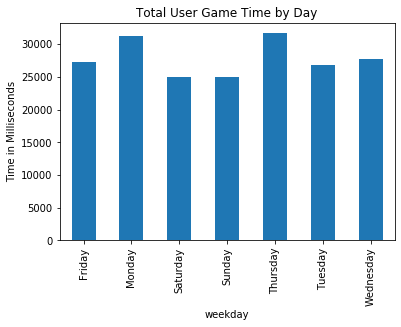

In [251]:
game_time_group.groupby('weekday').game_mins.sum().plot(kind='bar')

plt.title('Total User Game Time by Day')
plt.ylabel('Time in Milliseconds')

## Which weekday has the most users logging in?

In [252]:
game_time_group.groupby('weekday').installation_id.nunique().sort_values(ascending=False)

weekday
Friday       1085
Thursday     1049
Monday        985
Wednesday     973
Tuesday       971
Saturday      919
Sunday        872
Name: installation_id, dtype: int64

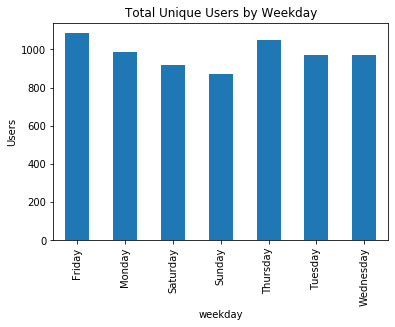

In [253]:
game_time_group.groupby('weekday').installation_id.nunique().plot(kind='bar')

plt.title('Total Unique Users by Weekday')
plt.ylabel('Users')
plt.show()

# How much time are users spending by type?

## Games

In [254]:
games_df = game_time_group[game_time_group.type == 'Game']
games_df.head(2)

,installation_id,game_session,type,date,weekday,game_mins
0,0006a69f,0336db4dee65ad4b,Game,2019-08-06,Tuesday,1.929867
2,0006a69f,0721802df0531701,Game,2019-08-29,Thursday,2.788950


In [255]:
print(f'Users are spending a total of {games_df.game_mins.sum()} minutes playing games.')

Users are spending a total of 97229.9732 minutes playing games.


## Activities

In [256]:
activities_df = game_time_group[game_time_group.type == 'Activity']
activities_df.head(5)

,installation_id,game_session,type,date,weekday,game_mins
1,0006a69f,05921a6eb858eeba,Activity,2019-08-06,Tuesday,1.525133
5,0006a69f,239576a91af9fd4d,Activity,2019-08-09,Friday,1.834167
6,0006a69f,2b9d5af79bcdb79f,Activity,2019-08-06,Tuesday,1.496117
7,0006a69f,2ecc82dcd2847233,Activity,2019-08-06,Tuesday,1.746933
10,0006a69f,585ea3c14d101571,Activity,2019-08-06,Tuesday,25.343333


In [257]:
print(f'Users are spending a total of {activities_df.game_mins.sum()} minutes playing activities.')

Users are spending a total of 76370.12865 minutes playing activities.


## Assessments

In [258]:
assessments_df = game_time_group[game_time_group.type == 'Assessment']
assessments_df.head(5)

,installation_id,game_session,type,date,weekday,game_mins
15,0006a69f,6bdf9623adc94d89,Assessment,2019-08-06,Tuesday,0.447117
18,0006a69f,77b8ee947eb84b4e,Assessment,2019-08-06,Tuesday,1.546650
23,0006a69f,901acc108f55a5a1,Assessment,2019-08-06,Tuesday,0.663383
24,0006a69f,9501794defd84e4d,Assessment,2019-08-06,Tuesday,0.530717
35,0006a69f,e7e7db2a241eadcc,Assessment,2019-08-06,Tuesday,0.146483


In [260]:
print(f'Users are spending a total of {assessments_df.game_mins.sum()} minutes taking assessments.')

Users are spending a total of 21008.052466666668 minutes taking assessments.


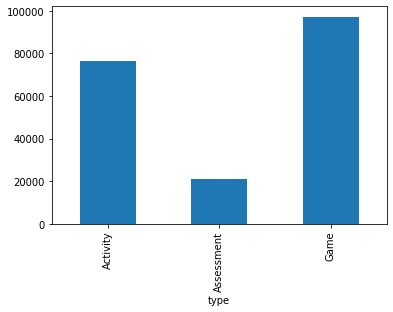

In [262]:
game_time_group.groupby('type').game_mins.sum().plot(kind='bar')

In [263]:
game_time_group.type.value_counts()

Game          24791
Activity      22478
Assessment    12708
Name: type, dtype: int64

In [277]:
Types=pd.DataFrame()
Types['Type']=game_time_group.type.value_counts().index
Types['Count']=game_time_group.type.value_counts().values

py.init_notebook_mode(connected=True)
fig = go.Figure(data=[go.Pie(labels=Types['Type'], values=Types['Count'], hole=0.2)])

fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=my_pal, line=dict(color='#000000', width=2)))
fig.show()